# <center>Custom Implementation of Linear Regression</center>

## Team Details:
#### Name: Rajesh Kumar Gupta
#### Banner Number: B00791207
#### Email ID: rajesh.gupta@dal.ca

#### Name: Vismay Revankar
#### Banner Number: B00813441
#### Email ID: vismayhr@dal.ca

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from decimal import Decimal
from math import log2
import graphviz
from sklearn import tree
from IPython.display import Image
from IPython.core.display import HTML

Download the following datasets from google drive [The links and names are embedded in the commands]. 

Those who use Linux/Mac/Colab can directly run the below cell by uncommenting the commands. 

In [0]:
# !curl -L -o real_news.txt "https://drive.google.com/uc?export=download&id=1pVbIc8ZGqsNVQE7UXa6Pu5VxkW57Uono"
# !curl -L -o fake_news.txt "https://drive.google.com/uc?export=download&id=1ejl2esjM8heh90hjdtUh39h3ysLeNa3A"
# !curl -L -o houses.csv "https://drive.google.com/uc?export=download&id=1mwmM-EF58LRQjm0Hj5oirRAIXuTvlDzP"

## 2. Linear Regression

### Review Questions [10 pts (+5 bonus)]:

1. <b> Update rule: </b>In addition to the usual loss term based on residuals, the cost function of linear regression can also incorporate a term for something called <i>regularization</i>. (The intuition behind this will be discussed in class later, but for now all you need is the equation). The cost function is then given as the sum of the squares of the residuals, plus an additional regularization term as follows:

    $$\epsilon = \frac{1}{2N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)})^2 + \frac{\lambda}{2} \sum_{j=0}^{D} w_j^2$$
   
   - N - size of training data
   - t - Target output
   - The predicted output $y$ is computed for a given $x$ as $$y = \sum_{j=0}^{D} w_jx_j$$ 
  Assume that $x_0$ is always set to 1,  so that $w_0$ behaves as the bias term (this is just a notational convenience).
   - D - Number of dimensions of each training data
   - $\lambda$ - controls the amount of regularization. Assume it is fixed to have some value between 0 and 1. 
   - $\epsilon$ - The cost function to be minimized
   
   <b>Q:</b> Fill in the Gradient descent update rule for $w_j$ below [2 pts]:
               
$$w_j \leftarrow w_j - \alpha /N \sum_{i=1}^{N} x_j(y^{(i)} - t^{(i)})$$
  
   
   <b>Q:</b> This type of regularization is called "weight decay". Based on the above update rule, can you guess why? [1 pt] 
    <br><u><b>Answer:</b></u>Weight decay prevents the weights from growing too large and it reduces the chances of over fitting without increasing the bias significantly<br>
   Hint: Requires rearranging and grouping terms. 


2. <b>Cost function: </b> Consider a Linear regression model in 2D space with 2 weights and no bias term:
    $$ y = w_1 x_1 + w_2 x_2 $$ <br>
    With MSE (mean-squared error), the total cost for the dataset is $\epsilon = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)})^2 $.
    
    Given a training set consisting of $N=3$ examples:
    - $x^{(1)}=(2,0), t^{(1)} = 1$
    - $x^{(2)}=(0,1), t^{(2)} = 2$
    - $x^{(3)}=(0,1), t^{(3)} = 0$
    
   Write the cost in the form
    $$ \epsilon = c_1 (w_1 - d_1)^2 + c_2 ( w_2 - d_2)^2 + c_3$$
    
   <b>Q: </b> What are the values of $c_1, d_1, c_2, d_2$ and $c_3$? [2 pts] <br>
   <b>Q: </b> Plot the above function for $\epsilon = 1$; you may hand-draw it or use desmos graphing calculator. What shape does the cost function represent? [5 pts] <br>
   
   
  - <b>Bonus Q: </b> Repeat by setting $\epsilon=0$. What do you observe? Why? [2 pts] <br>
  <b><u>Answer: </b></u>When epsilon is 0, there is no line to fit the data as all weights are 0 and hence, the linear equation equals 0. To have a line that fits the data, atleast one of the weights must be non-zero.<br>
  - <b>Bonus Q: </b> Gradient Descent usually converges to the local minima; however, Linear Regression converges to the global minimum as there is only one minimum. What is your estimate of the number of different values of w1 and w2 at convergence? [3 pts] <br><b><u>Answer:</u></b>There are an infinite number of possible combinations for w1 and w2 at the global minima.

### 2.1 House Prices Data [5 pts]
We will apply linear regression to predict house sale prices based on the data for houses sold in King County between May 2014 and May 2015. 

This is the description of the dataset we will be using:

In [14]:
houses = pd.read_csv("houses.csv")
houses.describe()

,price (grands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated_age,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,45.994864,2.380882,1986.552492,12768.455652
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,12.359528,685.391304,27304.179631
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,2.000000,0.000000,399.000000,651.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,20.000000,0.000000,1490.000000,5100.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,42.000000,0.000000,1840.000000,7620.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,66.000000,0.000000,2360.000000,10083.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,117.000000,114.000000,6210.000000,871200.000000


In [15]:
house_data = np.array(houses)
X = house_data[:,1:] # Extract all columns of house_data excepting the price into X
Y = house_data[:,0] # Extract the price column of house_data into targets.
Y = Y.reshape((house_data.shape[0],1))
print(Y[-1])

_mean = house_data.mean()
_std = house_data.std()
print(_mean, _std)

[325.]
2164.2829453280433 13208.783338492505


### 2.2 Linear Regression Code [10 pts]

For this assignment, we will train a simple linear regression model without any regularization. 

In [17]:
def linear_regression(data,
                      targets,
                      learning_rate,
                      epochs,
                      normalize = True,
                      validate_code = False,
                      plot_learning_curve = False,
                      return_predictions = False
                     ):
    """
    The arguments are self-descriptive. 
    """
    
    # Store the coefficients and bias term in the parameters. 
    # Initialize them with zeros. 
    parameters = np.zeros((data.shape[1]+1,1))
      
    if normalize:
        # Normalize the data to have zero mean and unit variance.
        # Update the dataset.
        data_for_custom = (data - _mean) / _std
        ones_vector = np.ones((data.shape[0],1))
        data_for_custom = np.append(ones_vector, data_for_custom, axis=1)
        
        targets = (targets - _mean) / _std
    else:
        ones_vector = np.ones((data.shape[0],1))
        data_for_custom = np.append(ones_vector, data, axis=1)    

    tdata = np.transpose(data_for_custom)
    costs = []
    custom_predictions = []
    
    for epoch in range(epochs):
        custom_prediction = data_for_custom.dot(parameters)
        custom_predictions.append(custom_prediction)
        loss = custom_prediction - targets
        parameters = parameters - ((1./data.shape[0]) * learning_rate * tdata.dot(loss))
        
        # Compute the new cost and append it to the list
        cost = np.sum(loss**2)/(2*data.shape[0])
        costs.append(cost)
        
    # Compute the predicted house prices.
    predictions = custom_predictions[np.argmin(costs)]
    
    # Validation code. Already done for you. 
    if validate_code:
        lr = LinearRegression()
        lr.fit(data,targets)
        print("The coefficients and bias term of the custom LR:", parameters.reshape(-1))
        print("The coefficients of the SkLearn LR:\t\t", lr.coef_.reshape(-1))
        print("The bias of the SkLearn LR\t\t\t",lr.intercept_)
        #print(lr.predict(data))
    
    # Print the MSE at the end of training. 
    final_mse = costs[np.argmin(costs)]
    print("MSE after training: ",final_mse)
    
    if plot_learning_curve:
        # Plot the learning curve. Use log scale. 
        pass
    
    # Return the required results. Already done for you. 
    if return_predictions and normalize:
        return (predictions*_std)+_mean
    elif return_predictions and not normalize:
        return predictions
    else:
        return final_mse

First, let's validate the code written using a simple synthesized dataset. <br>


[Verify your answer by manually comparing the parameters.]

In [18]:
X_simple = np.random.randn(100,3) # 100 3D data points
w = np.array([[1],[2],[3]])
b = 10
Y_simple = np.matmul(X_simple,w)+b
linear_regression(X_simple,
                          Y_simple,
                          normalize=False,
                          learning_rate=1, 
                          epochs=30,
                          validate_code=True)

The coefficients and bias term of the custom LR: [10.  1.  2.  3.]
The coefficients of the SkLearn LR:		 [1. 2. 3.]
The bias of the SkLearn LR			 [10.]
MSE after training:  2.934483681331642e-28


2.934483681331642e-28

### 2.3 Experiments [2+2+3]

Now, vary the learning_rates [Ex: In orders of 10 - 10, 1, 0.1, 0.01, 0.001] and plot the learning curves for each of them. 

Choose the best-performing model for 10000 iterations.

/home/vismay/Vismay/Softwares/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in square
/home/vismay/Vismay/Softwares/Anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


The coefficients and bias term of the custom LR: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
The coefficients of the SkLearn LR:		 [-2.98307324e-03  3.51311565e-03  8.27538238e-06 -1.65348215e-10
  2.04511125e-03  4.40034482e-02  3.28319611e-03  1.43192735e-03
  9.06590909e-03  3.90720721e-06  4.36817516e-06  2.72671138e-04
  1.00503542e-05  1.86717315e-06 -4.14847363e-08]
The bias of the SkLearn LR			 [-0.24000827]
MSE after training:  nan
The coefficients and bias term of the custom LR: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
The coefficients of the SkLearn LR:		 [-2.98307324e-03  3.51311565e-03  8.27538238e-06 -1.65348215e-10
  2.04511125e-03  4.40034482e-02  3.28319611e-03  1.43192735e-03
  9.06590909e-03  3.90720721e-06  4.36817516e-06  2.72671138e-04
  1.00503542e-05  1.86717315e-06 -4.14847363e-08]
The bias of the SkLearn LR			 [-0.24000827]
MSE after training:  nan
The coefficients and bias term of the custom LR: [nan nan nan nan 

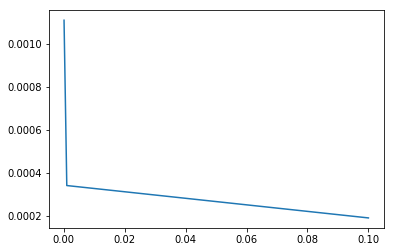

In [19]:
learning_rates_list = [10, -10, 1, 0.1, 0.001, 0.0001]
mse_list = []
for learning_rate in learning_rates_list:
    mse = linear_regression(X, Y, learning_rate, 10000, return_predictions=False, validate_code=True)
    mse_list.append(mse)
plt.plot(learning_rates_list, mse_list)

For the best-performing model, plot the graph of predicted prices vs actual prices (scatter plot).

The coefficients and bias term of the custom LR: [-8.32731298e-02  1.35326457e-02  1.37178043e-02  1.55065761e-01
  7.89909760e-05  1.36634901e-02  1.36811347e-02  1.39888111e-02
  1.37368729e-02  1.40180048e-02  7.93403725e-02  8.93698404e-02
  2.31582166e-02  1.61499789e-02  8.10206019e-02 -7.95627866e-04]
The coefficients of the SkLearn LR:		 [-2.98307324e-03  3.51311565e-03  8.27538238e-06 -1.65348215e-10
  2.04511125e-03  4.40034482e-02  3.28319611e-03  1.43192735e-03
  9.06590909e-03  3.90720721e-06  4.36817516e-06  2.72671138e-04
  1.00503542e-05  1.86717315e-06 -4.14847363e-08]
The bias of the SkLearn LR			 [-0.24000827]
MSE after training:  0.00019161374112232883


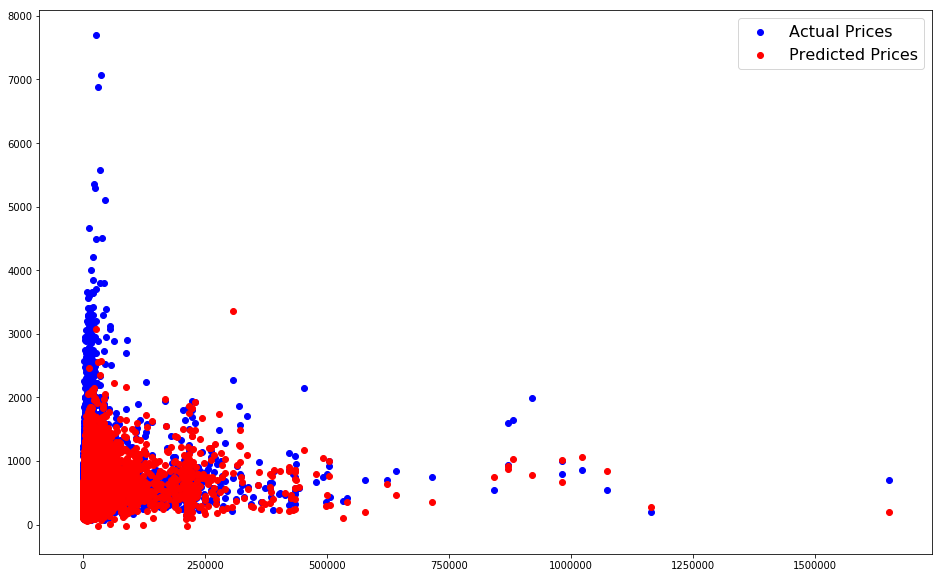

In [20]:
living_area = X[:,3]
living_area = np.reshape(living_area, (living_area.shape[0],1))
best_predictions = linear_regression(X, Y, 0.1, 10000, return_predictions=True, validate_code=True)

plt.figure(figsize=(16,10))
actual_prices = plt.scatter(living_area, Y, color='b')
predicted_prices = plt.scatter(living_area, best_predictions, color='r')

plt.legend((actual_prices, predicted_prices),
           ('Actual Prices', 'Predicted Prices'),
           scatterpoints=1,
           loc='upper right',
           fontsize=16)

plt.show()

Plot the predictions of the best-obtained model as a function of the sqft_living. 

Now, train a linear regressor (LR2) that predicts the house price only based on sqft_living. 
In the same plot as above, plot the graph of LR2 predictions vs sqft_living.

The coefficients and bias term of the custom LR: [-0.12374193  0.0007947 ]
The coefficients of the SkLearn LR:		 [6.01646212e-08]
The bias of the SkLearn LR			 [-0.12387215]
MSE after training:  0.0003831351166006372


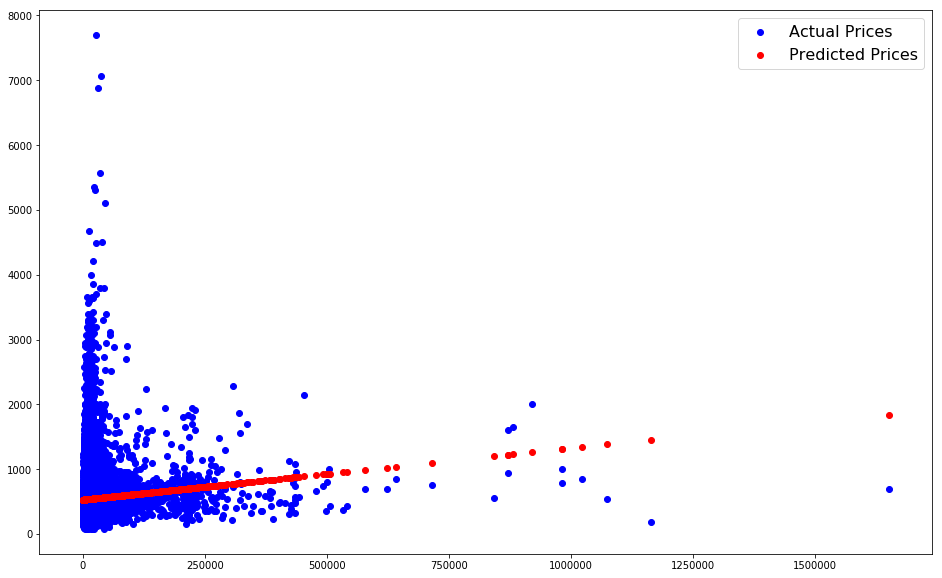

In [21]:
living_area = X[:,3]
living_area = np.reshape(living_area, (living_area.shape[0],1))
lr2_best_predictions = linear_regression(living_area, Y, 0.1, 10000, return_predictions=True, validate_code=True)

plt.figure(figsize=(16,10))
actual_prices = plt.scatter(living_area, Y, color='b')
predicted_prices = plt.scatter(living_area, lr2_best_predictions, color='r')
plt.legend((actual_prices, predicted_prices),
           ('Actual Prices', 'Predicted Prices'),
           scatterpoints=1,
           loc='upper right',
           fontsize=16)
plt.show()

### 2.4 Observations [8 pts]

In this part, list the various conclusions you made from the experiments above. <br>
For example: 
- What did you learn by observing the various plots above? <br><b><u>Answer:</u></b> In the plot, where only sqft area is used to predict the prices, it can be seen that the price linearly increases with increase in area. However, in the plot where 15 parameters are used, it can be seen that there is no linear increase in price with respect to a single parameter.
- How well did Linear Regression perform? <br><b><u>Answer:</u></b> Calculate Accuracy based on input data and comment on why certain pointrs were misclassified.
<b><u> As seen in the first plot, the custom linear regression closely predicts many of the values. The misclassified values can be considered as outliers which do not follow the parameters. </u></b>
- Can you think of a way to improve the performance? <br><b><u>Answer:</u></b> Some ways to improve the performance could be:
  * Cross validation
  * Increase the number of parameters
  * Increase the size of the dataset
  * Find and establish correlations between dependent variables